#  <center> **<span style='color:red'>Module Computer Experiments, INSA de Toulouse** </span> </center>

# TP1 sur <span style='color:blue'>la planification d’expériences numériques</span>

#            <span style='color:green'>SOLUTION</span>


## EXERCICE 1) Plan Maximin

**Question 1.a)** Créez un plan d’expériences Maximin de $9$ points pour $2$ variables uniformes $\mathcal{U}[0,1]$ (matrice de $9$ lignes à $2$ colonnes).<br/>
Pour cela, une méthode simple consiste à générer un grand nombre de plans aléatoires et de prendre le meilleur au sens de la maximisation de la distance minimale entre $2$ points du plan (critère dit *maximin*). La fonction `mindist` codant cette distance se trouve dans le package  `DiceDesign `.<br/>
Visualisez ce plan par rapport à un plan aléatoire pur (Monte-Carlo).

In [1]:
rm(list=ls())
graphics.off()

library(randtoolbox)

library(DiceDesign)
help(package="DiceDesign")
?mindist

Le chargement a nécessité le package : rngWELL

This is randtoolbox. For an overview, type 'help("randtoolbox")'.



Distance minimale entre 2 points pour le plan pur Monte Carlo =  0.2008458 
Distance minimale entre 2 points pour le plan Maximin =  0.2849212 


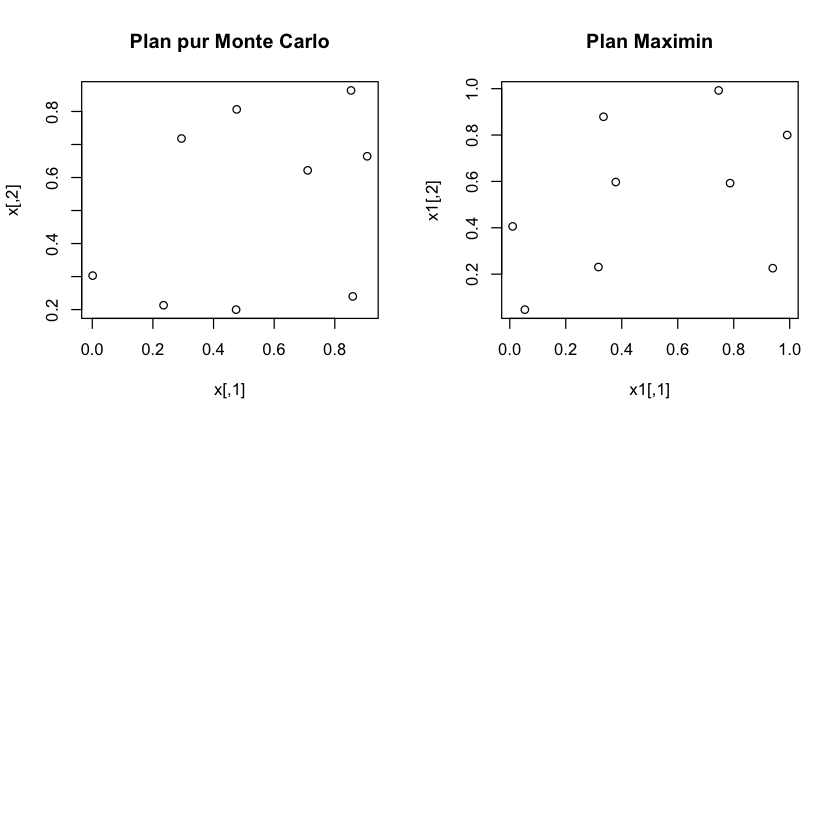

In [2]:
# Génération d'un grand nombre de plans aléatoires purs Monte Carlo
critere=0
for (i in 1:10000)
{
  x = matrix(runif(n=2*9),nrow=9,ncol=2)
  if ( mindist(x) > critere ) # Sélection du plan courant qui maximise la distance minimale entre 2 de ses points
  { 
    x1 = x
    critere = mindist(x)
  }
}
# Synthaxe : les '{}' sont ici esthétiques

# Affichage du meilleur plan parmi l'ensemble des plans générés
par(mfrow=c(2,2))
plot(x,main="Plan pur Monte Carlo")
plot(x1,main="Plan Maximin")
cat("Distance minimale entre 2 points pour le plan pur Monte Carlo = ",mindist(x),"\n")
cat("Distance minimale entre 2 points pour le plan Maximin = ",mindist(x1),"\n")

**Question 1.b)** Construisez un plan factoriel complet pour $2$ variables à $3$ niveaux. On obtient un total de $3^2 = 9$ points. Utilisez la fonction `factDesign()` du package `DiceDesign`. Visualisez ce plan par rapport aux précédents et comparez les valeurs prises par le critère *maximin*.

In [3]:
?factDesign

0.0,0.0
0.0,0.5
0.0,1.0
0.5,0.0
0.5,0.5
0.5,1.0
1.0,0.0
1.0,0.5
1.0,1.0


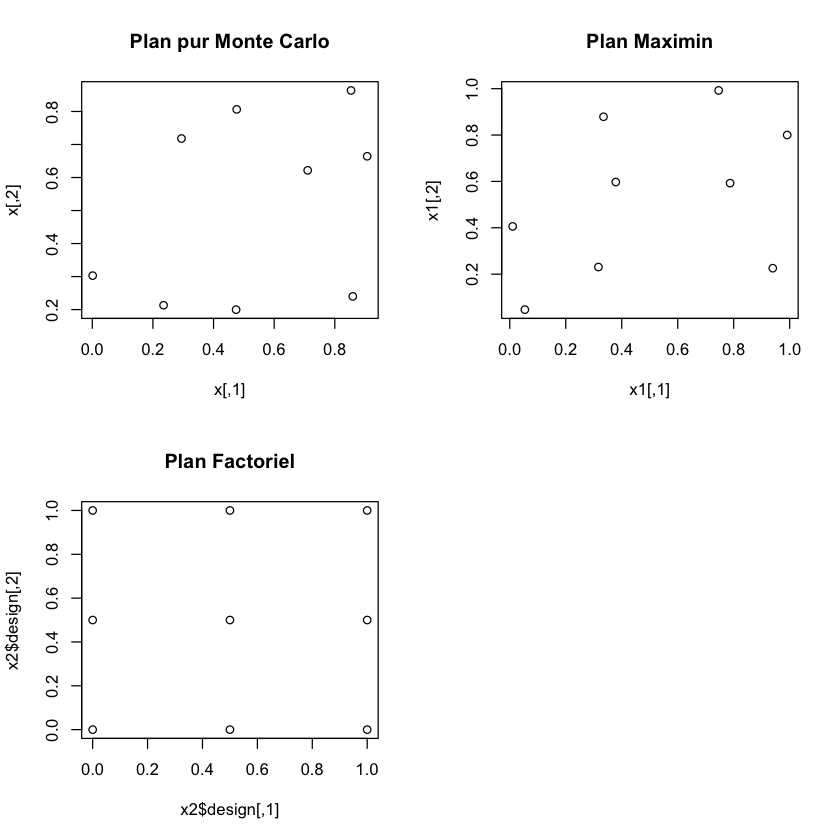

In [4]:
# Création du plan factoriel complet
x2 = factDesign(2,3)
x2 

# Comparaison graphique avec les plans précédents
par(mfrow=c(2,2))
plot(x,main="Plan pur Monte Carlo")
plot(x1,main="Plan Maximin")
plot(x2$design,main="Plan Factoriel")

In [5]:
# Comparaison de la distance minimale entre 2 points
cat("Distance minimale entre 2 points pour le plan pur Monte Carlo = ",mindist(x),"\n")
cat("Distance minimale entre 2 points pour le plan Maximin = ",mindist(x1),"\n")
cat("Distance minimale entre 2 points pour le plan Factoriel = ",mindist(x2$design),"\n")

Distance minimale entre 2 points pour le plan pur Monte Carlo =  0.2008458 
Distance minimale entre 2 points pour le plan Maximin =  0.2849212 
Distance minimale entre 2 points pour le plan Factoriel =  0.5 


**Question 1.c)** Même si le plan factoriel est meilleur au sens de la distance maximin, quels sont les problèmes que l’on entrevoit pour l’exploration d’un modèle numérique avec des plans factoriels complets ?

- Les sous-projections 1D sont de mauvaise qualité. 
- Le nombre de points ne peut pas être ordinaire.

Ici, c'est une puissance de 3. Imaginons que seuls $1000$ runs soit autorisés et que l'on ait $d = 7$ variables. $7^2 = 49$ ; $7^3 = 343$ ; $7^4 = 2401$. Il faut se limiter à un plan factoriel à $3$ niveaux et $70\%$ du budget autorisé n'est pas utilisé.

- Quand la dimension augmente, même en se limitant à $2$ niveaux, le nombre de points est trop grand. 

Par exemple, pour $d=20$, $n=2^d > 10^6$.

$\leadsto$ Une alternative : le plan factoriel fractionnaire mais cela ne résout pas le premier problème.

## EXERCICE 2) Plan à discrépance faible

**Question 2.a)** Construisez une suite de Sobol de $9$ points pour $2$ variables $\mathcal{U}[0,1]$ en utilisant la fonction `sobol` du package  `randtoolbox`. Visualisez ce plan et comparez la valeur prise par le critère *maximin* à celle obtenue pour le plan Maximin.

Distance minimale entre 2 points pour la suite de Sobol =  0.1767767 


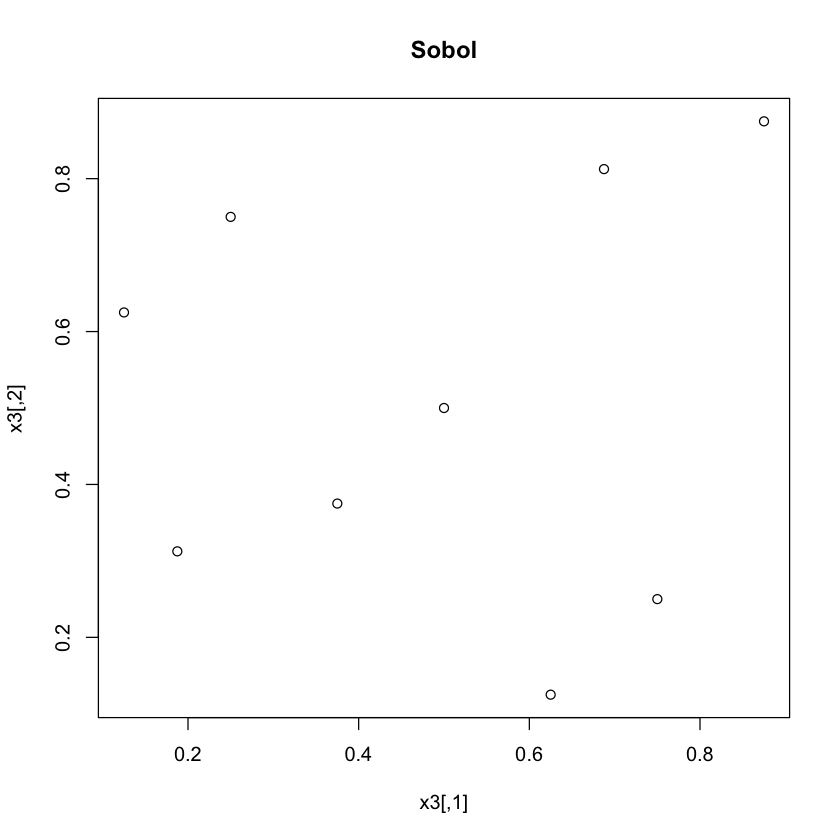

In [6]:
x3 = sobol(9,2) # Création d'une suite de Sobol de 9 points en dimension 2 (9 premiers points de la suite)
plot(x3,main="Sobol")
cat("Distance minimale entre 2 points pour la suite de Sobol = ",mindist(x3),"\n")

**Question 2.b)** Calculez les critères de discrépance modifiée et centrée de ce plan et des trois plans précédents (Maximin, Monte-Carlo pur, factoriel complet) et comparez-les. On utilisera la fonction `discrepancyCriteria` du package `DiceDesign`.

In [7]:
?discrepancyCriteria

In [8]:
# Calcul des critères de discrépance pour les différents plans
dis_MC = discrepancyCriteria(x,type=c('M2','C2'))
dis_Maximin = discrepancyCriteria(x1,type=c('M2','C2'))
dis_Fact = discrepancyCriteria(x2$design,type=c('M2','C2'))
dis_Sobol = discrepancyCriteria(x3,type=c('M2','C2'))
# Affichage des valeurs
cat("Critères discrépance M2 et C2 pour le plan pur Monte Carlo = ", dis_MC$DisM2, " - ", dis_MC$DisC2,"\n")
cat("Critères discrépance M2 et C2 pour le plan Maximin = ", dis_Maximin$DisM2, " - ", dis_Maximin$DisC2,"\n")
cat("Critères discrépance M2 et C2 pour le plan Factoriel = ", dis_Fact $DisM2, " - ", dis_Fact $DisC2,"\n")
cat("Critères discrépance M2 et C2 pour la suite de Sobol = ", dis_Sobol$DisM2, " - ", dis_Sobol$DisC2,"\n")


Critères discrépance M2 et C2 pour le plan pur Monte Carlo =  0.1345151  -  0.1294218 
Critères discrépance M2 et C2 pour le plan Maximin =  0.1432573  -  0.1326204 
Critères discrépance M2 et C2 pour le plan Factoriel =  0.2714558  -  0.2468943 
Critères discrépance M2 et C2 pour la suite de Sobol =  0.1065616  -  0.0930309 


**Question 2.c)** Construisez une suite de Halton de $200$ points pour $8$ variables $\mathcal{U}[0,1]$ avec la fonction `halton`du package `randtoolbox`.  Le plan obtenu est une matrice de $200$ lignes et $8$ colonnes. Visualisez les *scatterplots* de ce plan pour chaque couple de variables avec la fonction `pairs()`.

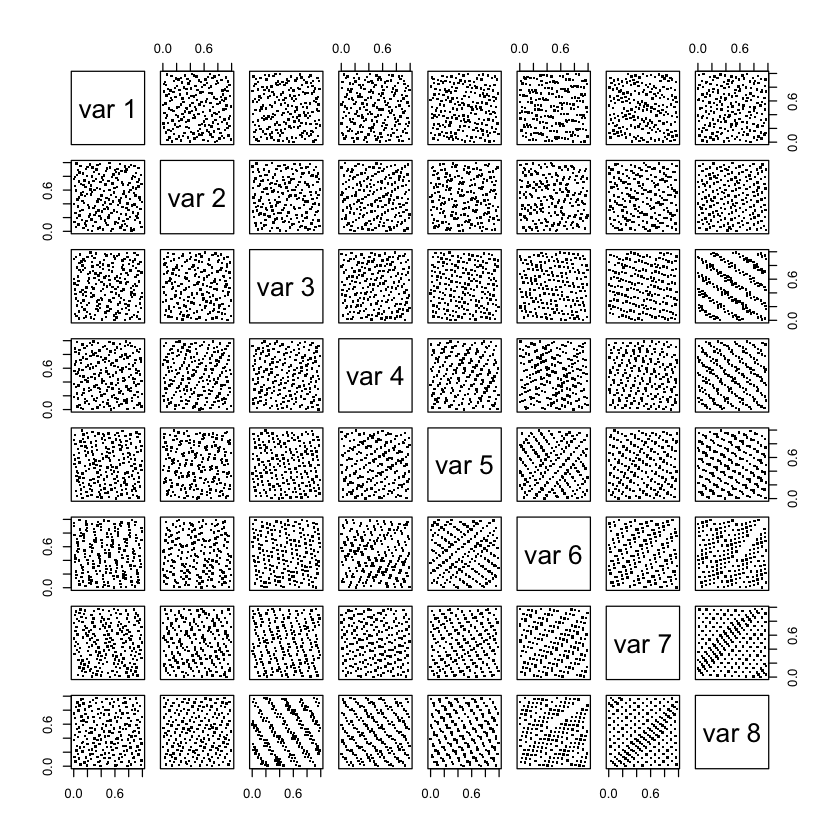

In [9]:
x4 = halton(200,8)
pairs(x4,pch =".",cex=3)

Quels types d’anomalies détectez-vous ? Quel problème cela pose-t-il en termes d’exploration de l’espace ?

**Conclusion :** Pour certaines sous-projections ($U_3$ avec $U_8$, $U_4$ avec $U_8$ ou encore $U_7$ avec $U_8$), on voit apparaître des "motifs" et des "structurations" du plan, ainsi que des zones lacunaires.
Malgré l’uniformité de la distribution dans l'hypercube unité, ces suites présentent ce type de pathologies en dimension élevée. Ces pathologies (qui résultent de la régularité des suites) s'observent surtout pour les dernières variables.

**Question 2.d)** Répétez **2.c)** avec une suite de Sobol.

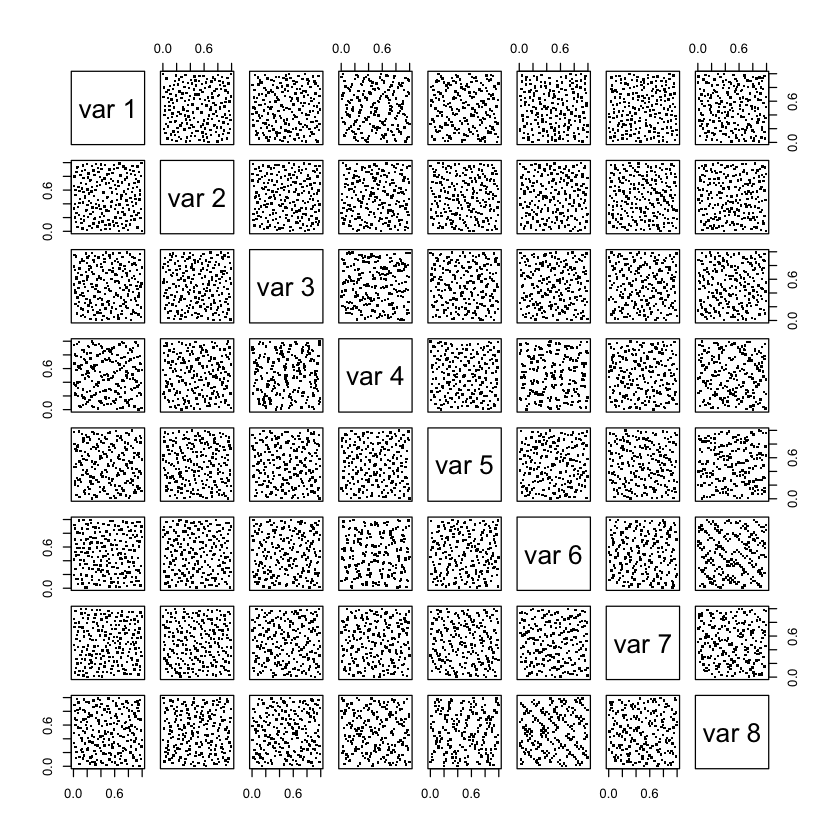

In [10]:
x5=sobol(200,8)
pairs(x5,pch =".",cex=3)

**Question 2.e)** Un des problèmes des suites à discrépance faible est la création d'alignements de points dans les plans de sous-projection des variables d'entrée. Pour détecter ce phénomène, un outil de visualisation des défauts d’uniformité selon
les projection 1D à 3D a été proposé : le radar d’uniformité.<br/>
En dimension $2$, cet outil effectue un balayage angulaire de chaque sous-espace 2D et, en scannant toutes les directions, il réalise un test statistique d'uniformité des points projetés sur l'axe correspondant au balayage ($H_0$ : répartition uniforme).
Cette technique est disponible via la fonction `rss2d()` du package ` DiceDesign `. Appliquez dans le cas de la suite de Sobol.


2D Radial Scanning Statistic (RSS) with GREENWOOD statistic
Discretization step (in degree) : 0.5

Maximum of RS statistic values (global statistic) per pair of dimensions
(1,2) 0.02864853
(1,3) 0.02899501
(1,4) 0.0283213
(1,5) 0.03607195
(1,6) 0.03269243
(1,7) 0.02537945
(1,8) 0.02537766
(2,3) 0.02138945
(2,4) 0.02610035
(2,5) 0.0356254
(2,6) 0.03194204
(2,7) 0.04221526
(2,8) 0.02616632
(3,4) 0.02809769
(3,5) 0.02848998
(3,6) 0.02880076
(3,7) 0.02320316
(3,8) 0.03000799
(4,5) 0.03827669
(4,6) 0.02416795
(4,7) 0.03017962
(4,8) 0.02930106
(5,6) 0.02300811
(5,7) 0.04162598
(5,8) 0.03225625
(6,7) 0.02511603
(6,8) 0.03088158
(7,8) 0.03218755



$global.stat
           [,1]       [,2]       [,3]       [,4]       [,5]       [,6]
[1,]         NA 0.02864853 0.02899501 0.02832130 0.03607195 0.03269243
[2,] 0.02864853         NA 0.02138945 0.02610035 0.03562540 0.03194204
[3,] 0.02899501 0.02138945         NA 0.02809769 0.02848998 0.02880076
[4,] 0.02832130 0.02610035 0.02809769         NA 0.03827669 0.02416795
[5,] 0.03607195 0.03562540 0.02848998 0.03827669         NA 0.02300811
[6,] 0.03269243 0.03194204 0.02880076 0.02416795 0.02300811         NA
[7,] 0.02537945 0.04221526 0.02320316 0.03017962 0.04162598 0.02511603
[8,] 0.02537766 0.02616632 0.03000799 0.02930106 0.03225625 0.03088158
           [,7]       [,8]
[1,] 0.02537945 0.02537766
[2,] 0.04221526 0.02616632
[3,] 0.02320316 0.03000799
[4,] 0.03017962 0.02930106
[5,] 0.04162598 0.03225625
[6,] 0.02511603 0.03088158
[7,]         NA 0.03218755
[8,] 0.03218755         NA

$worst.case
[1] 2 7

$worst.dir
[1] 0.7071068 0.7071068

$stat
  [1] 0.005584717 0.006856255 0.007928198 0.010275593 0.011072900 0.008983618
  [7] 0.009664226 0.009892875 0.010384974 0.010451014 0.009709768 0.009592234
 [13] 0.009498961 0.009375596 0.009208045 0.008546272 0.008788073 0.008769641
 [19] 0.008995153 0.007977202 0.008326442 0.008626026 0.009111235 0.010212708
 [25] 0.009887442 0.009297227 0.008794401 0.008802430 0.008516141 0.008343112
 [31] 0.008937645 0.010073105 0.010129295 0.010817402 0.010227549 0.009267193
 [37] 0.009274161 0.011424919 0.008734742 0.008987360 0.009807888 0.010557720
 [43] 0.011070890 0.009999205 0.009337407 0.008958023 0.008691738 0.008222586
 [49] 0.007946474 0.008349692 0.008500276 0.008613158 0.008288043 0.006975447
 [55] 0.007864953 0.008433752 0.008888090 0.008331902 0.009788710 0.008952264
 [61] 0.008199373 0.007869129 0.009799369 0.008021938 0.008106624 0.008944453
 [67] 0.008761445 0.008917616 0.008855494 0.009526474 0.009797018 0.010218235
 [73] 0.009157310 0.008641017 0.008810879 0.009484370 0.009586986 0.009713342
 [79] 0.009690636 0.008882538 0.008713292 0.009174822 0.009835277 0.010130026
 [85] 0.009829040 0.011020385 0.013583637 0.017551128 0.023125126 0.030765831
 [91] 0.042215258 0.031342680 0.024272645 0.019000009 0.014618034 0.012018301
 [97] 0.010321095 0.010448223 0.009167874 0.008569737 0.008057215 0.008288694
[103] 0.008199902 0.009100545 0.010528586 0.009765392 0.009408767 0.009190334
[109] 0.009189209 0.010507213 0.009270613 0.009250964 0.008458850 0.008348085
[115] 0.008338196 0.008558998 0.008175529 0.008126844 0.010081036 0.007807897
[121] 0.007820519 0.008264693 0.009775355 0.007899337 0.008081087 0.008359936
[127] 0.007534440 0.006664248 0.007456441 0.007805927 0.007452384 0.007517557
[133] 0.007665540 0.008593913 0.009611633 0.009561549 0.009717088 0.009418893
[139] 0.009647269 0.009524038 0.009744292 0.009512178 0.010574168 0.013092557
[145] 0.010873525 0.009798109 0.009656144 0.009279217 0.009146329 0.009551544
[151] 0.008594834 0.008078409 0.008192262 0.008634824 0.008319304 0.008216695
[157] 0.008689525 0.009083722 0.008516916 0.008517536 0.008976064 0.009751647
[163] 0.010709441 0.009335844 0.008638599 0.008854068 0.009445348 0.009259005
[169] 0.009148981 0.009951878 0.009537851 0.010044615 0.010108562 0.010212045
[175] 0.010895937 0.011155395 0.011935228 0.009953931 0.007498620 0.006796419
[181] 0.005584717 0.006780847 0.007344575 0.009841201 0.010801645 0.010561080
[187] 0.010354215 0.009458072 0.009430624 0.009309847 0.009410789 0.009628984
[193] 0.009425072 0.009668406 0.008833907 0.008336584 0.008228727 0.008730549
[199] 0.009016176 0.008704921 0.008370834 0.008397125 0.008341335 0.008423011
[205] 0.008543563 0.009450197 0.009824449 0.008099050 0.007325974 0.007613393
[211] 0.007689419 0.007970189 0.007839531 0.007631706 0.008517405 0.010494341
[217] 0.013019188 0.015970869 0.012331457 0.010146512 0.009198065 0.009130441
[223] 0.009136743 0.008544795 0.008120306 0.008076375 0.009048052 0.008659369
[229] 0.008610048 0.009189924 0.008645511 0.008293152 0.008127802 0.007520192

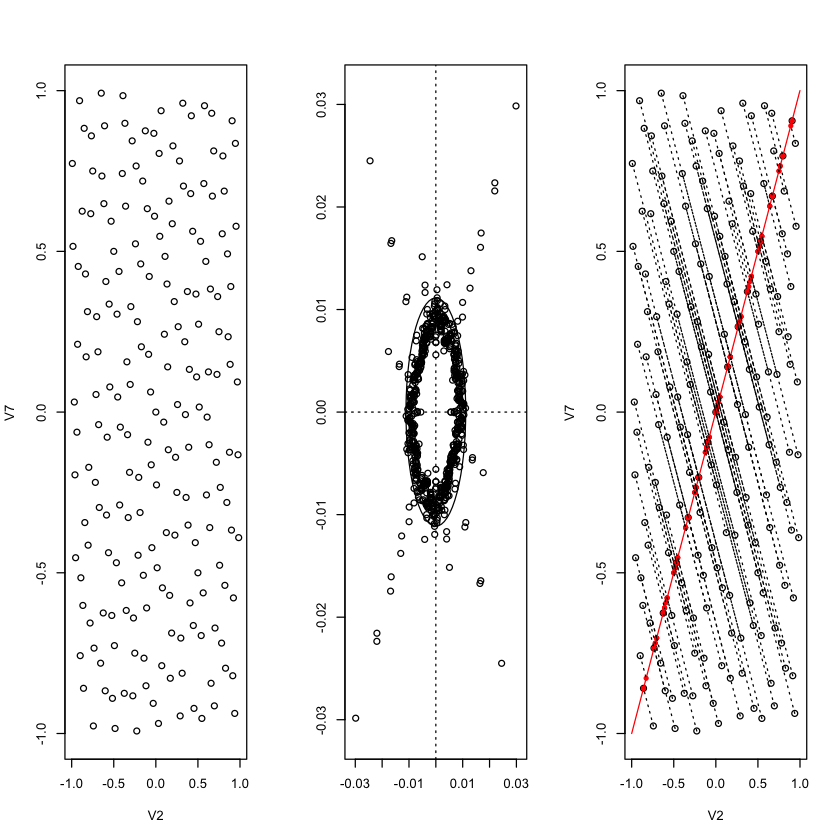

In [11]:
?rss2d()
rss2d(x5,lower=rep(0,8),upper=rep(1,8))

# EXERCICE 3) Plan Hypercube Latin (LHS)

**Question 3.a)** À l’aide du support de cours, construisez une fonction permettant de générer des LHS avec des lois marginales uniformes.

Rappelons que si $J$ et $U$ sont deux variables aléatoires indépendantes telles ques :

- $J$ est une variable aléatoire discrète de loi uniforme sur $\{1,\ldots,n\}$,
- $U$ est une variable aléatoire continue de loi uniforme sur $[0,1]$,

alors : $\displaystyle V = \frac{J-U}{n} \sim \mathcal{U}(0,1)$.

In [12]:
# function permettant de construire un plan LHS de N points sur l'hypercube [0,1]^d (d: dimension des entrées)
lhs <- function(N,p){
  ran = matrix(runif(N*p),nrow=N,ncol=p)   # tirage de N x p valeurs selon loi U[0,1]
  x = matrix(0,nrow=N,ncol=p)  # initialisaton de matrice de plan d'experiences

  # Pour chaque dimension 
    for (i in 1:p) {
      idx = sample(1:N)        # Tirage d'une permutation aléatoire des entiers {1,2,…,N}
      P = (idx-ran[,i]) / N    # Vecteur des probabilités : rajout d'une perturbation aléatoire (ran[,i]) dans la "case" et recalage entre [0,1] (division par N)
      x[,i] <- qunif(P)        # Transformation par la méthode de la fonction inverse pour avoir une loi U[0,1]
    }  
  return(x)}

**Question 3.b)** Construisez un LHS de $20$ points et $2$ variables $\mathcal{U}(0,1)$.

0.005411194,0.80067565
0.548832971,0.99973213
0.389022615,0.55673299
0.973379471,0.86612916
0.857773426,0.69024068
0.721123321,0.09964191
0.947722081,0.30708306
0.437603715,0.17952828
0.691609966,0.42332563
0.568036112,0.27047279
0.177446455,0.53863281


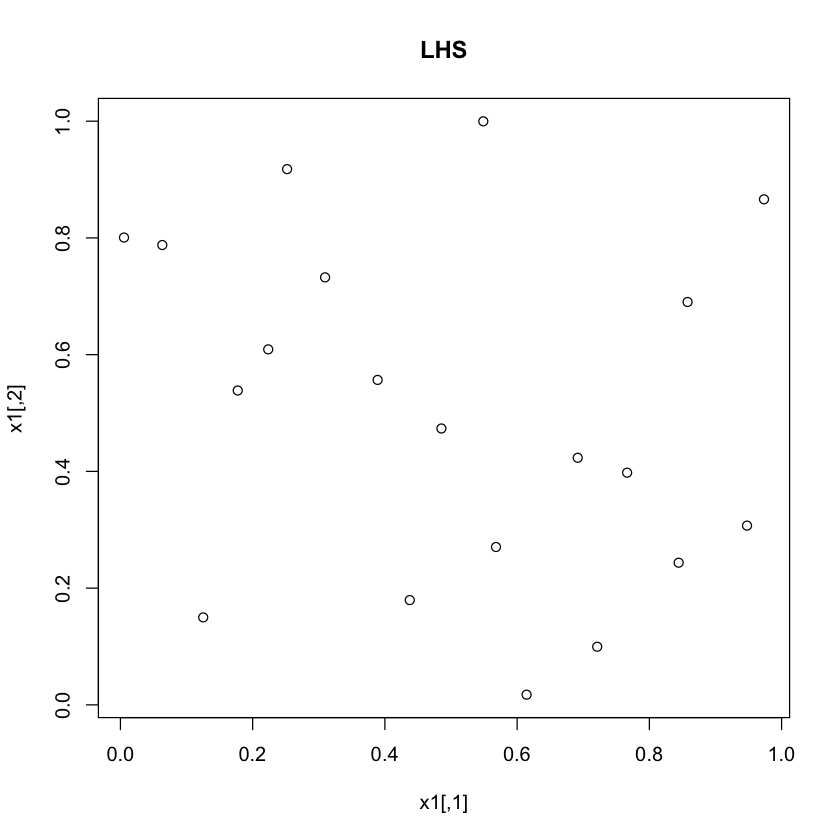

In [13]:
x1 = lhs(20,2)
x1
plot(x1, main="LHS")

**Question 3.c)** Construisez avec deux méthodes différentes un LHS Maximin (c'est-à-dire un LHS optimisé avec le critère *mindist*).

   - **Méthode 1 :** Générez un grand nombre de LHS et gardez celui qui conduit à la plus grande valeur de *mindist*.

In [14]:
n = 20 # nbre de points du design
d = 2  # Dimension des entrees
n_loop = 10000 # Nbre de LHS tirés aléatoirement

x2 = lhs(n,d) # Création d'un 1er LHS
critere= mindist(x2) # Initialisation du critère à maximiser

for (i in 1:n_loop)
{
  xnew = lhs(n,d) # Génération d'un nouveau LHS candidat
  if ( mindist(xnew) > critere ) # Test si amélioration du critère : si oui, mise à jour
  { 
    x2 = xnew
    critere = mindist(xnew)
  }
}

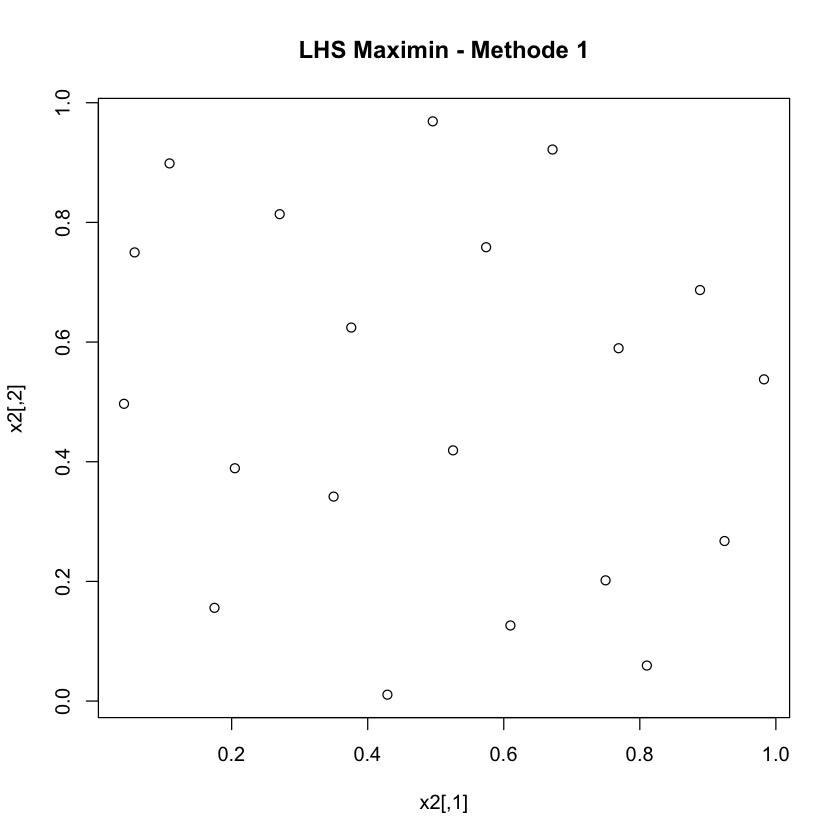

In [15]:
plot(x2, main="LHS Maximin - Methode 1")

 - **Méthode 2 :** Utilisez directement la fonction `maximinSA_LHS()` du package `DiceDesign`. Pour optimiser le critère *mindist*, cette fonction utilise l'algorithm de recuit simulé. L’utilisation de cet algorithme nécessite le réglage délicat de plusieurs paramètres d'optimisation (valeurs par défaut implémentées dans la fonction).

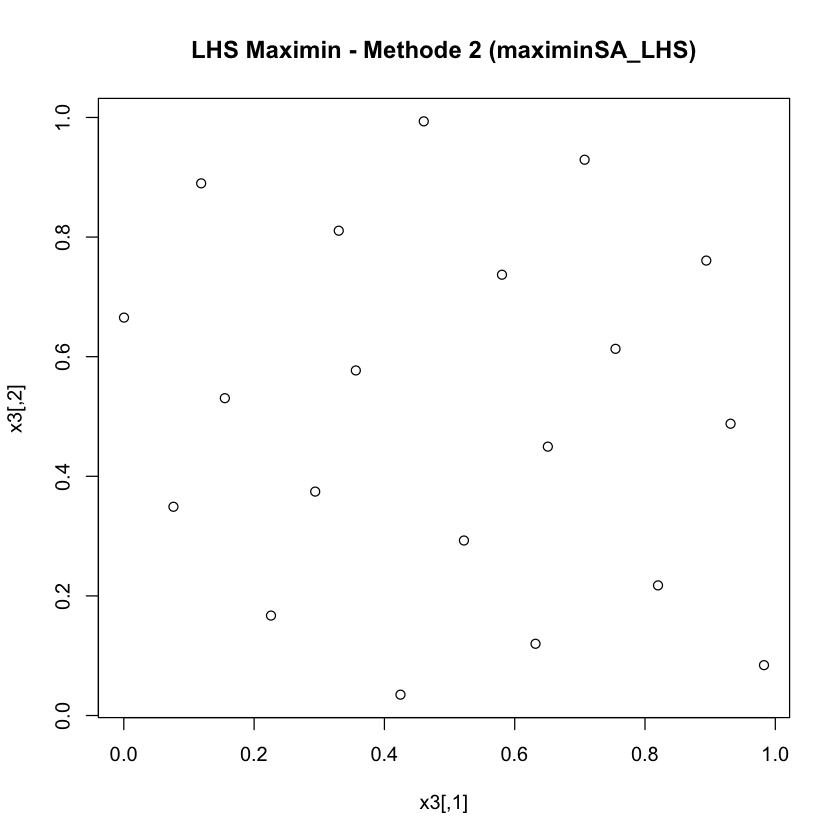

In [16]:
?maximinSA_LHS
xinit = lhs(n,d)
x3 = maximinSA_LHS(xinit)$design
plot(x3, main="LHS Maximin - Methode 2 (maximinSA_LHS)")

Comparer-les avec un LHS standard et un plan aléatoire pur en termes de visualisation graphique et de critère *mindist*.

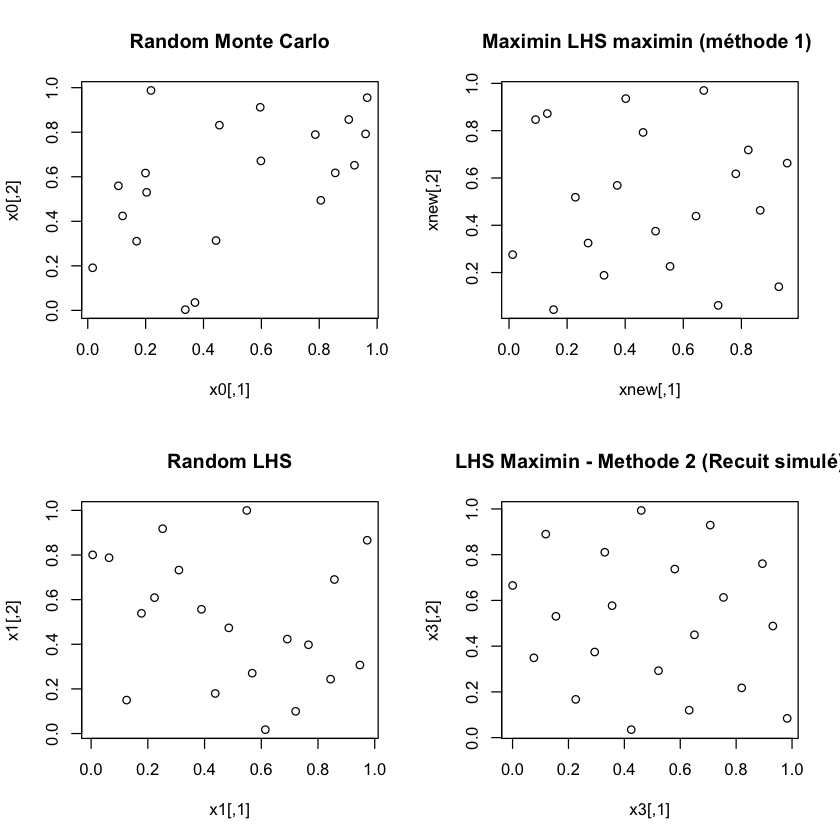

In [17]:
x0 = matrix(runif(n*d),nrow=n,ncol=d) # plan pur Monte Carlo

par(mfcol=c(2,2))
plot(x0,main="Random Monte Carlo")
plot(x1,main="Random LHS")
plot(xnew,main="Maximin LHS maximin (méthode 1) ")
plot(x3, main="LHS Maximin - Methode 2 (Recuit simulé)")

In [18]:
cat("critere mindist pour un plan pur Monte Carlo) :", mindist(x0), '\n')
cat("critere mindist pour un LHS aleatoire :", mindist(x1), '\n')
cat("critere mindist pour un LHS maximin (méthode 1) :", mindist(xnew), '\n')
cat("critere mindist pour un LHS maximin (optimisation par recuit simulé) :", mindist(x3), '\n')

critere mindist pour un plan pur Monte Carlo) : 0.04619505 
critere mindist pour un LHS aleatoire : 0.05933826 
critere mindist pour un LHS maximin (méthode 1) : 0.0478841 
critere mindist pour un LHS maximin (optimisation par recuit simulé) : 0.1937252 
